In [2]:
import pyforest

In [3]:
rf_path = '/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/paper/results/RF_results/'
neks = ['NEK2_binding','NEK2_inhibition','NEK3_binding','NEK5_binding','NEK9_binding','NEK9_inhibition']
samplings =['none_scaled','UNDER','SMOTE','ADASYN'] 
feats=['MOE','MFP'] 
RF_types = ['RF','RF_BCW','BRFC','BRFC_BCW']

# RF kfold Results
rf = pd.read_csv(f'{rf_path}RF_prod_test_results_all_NEK.csv')
rf['1-specificity']=1-rf['specificity']
rf['nek type'] = rf['NEK'].astype(str).str.split('_').str[1]
rf=rf.replace('none_scaled', 'no_sampling')
rf['model version'] = rf['RF_type'] 


rf_raw = rf[(rf['strategy'] == 'no_sampling') & (rf['RF_type'].isin(['RF', 'RF_BCW', 'BRFC', 'BRFC_BCW']))]
rf_other = rf[(rf['RF_type'] == 'RF') & (rf['strategy'].isin(['UNDER', 'SMOTE']))]  
rf_filtered = pd.concat([rf_raw, rf_other])
total_rf = rf_filtered.copy() 
total_rf['strategy'] =total_rf['strategy'].astype(str) +'_'+ total_rf['RF_type']

binding = total_rf[total_rf['nek type'] == 'binding'] 
inhib = total_rf[total_rf['nek type'] == 'inhibition'] 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
total_rf['strategy'].unique()

array(['no_sampling_RF', 'no_sampling_RF_BCW', 'no_sampling_BRFC',
       'no_sampling_BRFC_BCW', 'UNDER_RF', 'SMOTE_RF'], dtype=object)

In [5]:
samp_palette={'no_sampling': 'tab:blue', 'UNDER':'tab:orange', 'SMOTE': 'hotpink', 'ADASYN':'tab:red', 
             'no_sampling_RF': 'cornflowerblue', 'no_sampling_RF_BCW': 'lavender', 'UNDER_RF': 'orange', 
             'no_sampling_BRFC': 'blue', 'SMOTE_RF': 'hotpink', 'ADASYN_RF': 'red', 
             'no_sampling_BRFC_BCW': 'black'}

In [6]:
rf_plots='/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/paper/plots/RF/prod/'

In [7]:
# for nek in total_rf['NEK'].unique():
#     fig, axs = plt.subplots(1,2, figsize=(12,6))
#     nek_df = total_rf[total_rf['NEK']==nek]
    
#     moe_df = nek_df[(nek_df['NEK'] == nek) & (nek_df['feat_type'] == 'MOE')]
#     mfp_df = nek_df[(nek_df['NEK'] == nek) & (nek_df['feat_type'] == 'MFP')]
#     sns.scatterplot(data=moe_df, x='1-specificity', y='recall', hue='strategy', 
#                    s=300, alpha=0.6, ax=axs[0], legend=True, palette=samp_palette )
#     sns.scatterplot(data=mfp_df, x='1-specificity', y='recall', hue='strategy',
#                   s=300, alpha=0.6, ax=axs[1], legend=False, palette=samp_palette )
#     plt.suptitle(f'{nek} RF Models', fontsize=18, x=0.51, y =.96)
#     for i, ax in enumerate(axs): 
#         axs[i].plot([-0.1, 1.1],[-0.1,1.1], linestyle='--', color='gray')
#         axs[i].set_xlim(-0.1, 1.1)
#         axs[i].set_ylim(-0.1, 1.1)
#         axs[i].set_xlabel('1 - Specificity', fontsize=16)
#         axs[i].set_ylabel('Sensitivity (Recall)', fontsize=16)
    
        
#     axs[0].set_title(f'{nek} moe', fontsize=16)
#     axs[1].set_title(f'{nek} mfp', fontsize=16)
#     handles, labels = axs[0].get_legend_handles_labels()
#     fig.legend(handles=handles, labels=labels,
#                loc='upper center', bbox_to_anchor=(0.5, .01), ncol=2, fontsize=12)
#     axs[0].get_legend().remove()
    
#     plt.tight_layout(rect=[0, 0, 1, 0.95]) 
#     plt.savefig(f'{rf_plots}{nek}_RF_kfold_prod.png',bbox_inches='tight')
#     plt.tight_layout()
#     plt.show();

In [8]:
gp_path='/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/paper/results/GP_results/'
gp=pd.read_csv(f'{gp_path}GP_test_results_all_NEK.csv')
gp['1-specificity']=1-gp['specificity']
gp['nek type'] = gp['NEK'].astype(str).str.split('_').str[1]
gp=gp[gp['strategy']!='ADASYN']
gp=gp.replace('none_scaled', 'no_sampling')
# gp['strategy'] =gp['strategy'].astype(str) +'_'+ gp['kernel_type']
gp['modeling_type'] = gp['kernel_type']

gp=gp.drop(columns=['kernel_type'])
gp['model version'] = gp['modeling_type'] 
binding_gp = gp[gp['nek type'] == 'binding'] 
inhib_gp = gp[gp['nek type'] == 'inhibition'] 
gp_strategies=['no_sampling_GP_RBF', 'no_sampling_GP_matern', 'UNDER_GP_RBF',
       'UNDER_GP_matern', 'SMOTE_GP_RBF', 'SMOTE_GP_matern',
       'ADASYN_GP_RBF', 'ADASYN_GP_matern']
gen_colors = ['cornflowerblue', 'orange', 'hotpink','red'] 

for kern in ['RBF','matern']: 
    for samp, color in zip(['no_sampling','UNDER','SMOTE','ADASYN'], gen_colors): 
        gp_type = f'{samp}_GP_{kern}'
        samp_palette[gp_type]=color
    
    

<IPython.core.display.Javascript object>

In [9]:
gp['strategy'].unique()

array(['no_sampling', 'UNDER', 'SMOTE'], dtype=object)

In [10]:
total_rf['nek type'].value_counts()

nek type
binding       48
inhibition    24
Name: count, dtype: int64

In [11]:
gp['nek type'].value_counts()

nek type
binding       48
inhibition    24
Name: count, dtype: int64

In [12]:
model_types_dict = {'RF':'s', 'GP_RBF': 'o', 'GP_matern':'X' }
samp_palette

{'no_sampling': 'tab:blue',
 'UNDER': 'tab:orange',
 'SMOTE': 'hotpink',
 'ADASYN': 'tab:red',
 'no_sampling_RF': 'cornflowerblue',
 'no_sampling_RF_BCW': 'lavender',
 'UNDER_RF': 'orange',
 'no_sampling_BRFC': 'blue',
 'SMOTE_RF': 'hotpink',
 'ADASYN_RF': 'red',
 'no_sampling_BRFC_BCW': 'black',
 'no_sampling_GP_RBF': 'cornflowerblue',
 'UNDER_GP_RBF': 'orange',
 'SMOTE_GP_RBF': 'hotpink',
 'ADASYN_GP_RBF': 'red',
 'no_sampling_GP_matern': 'cornflowerblue',
 'UNDER_GP_matern': 'orange',
 'SMOTE_GP_matern': 'hotpink',
 'ADASYN_GP_matern': 'red'}

<IPython.core.display.Javascript object>

(108, 19)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

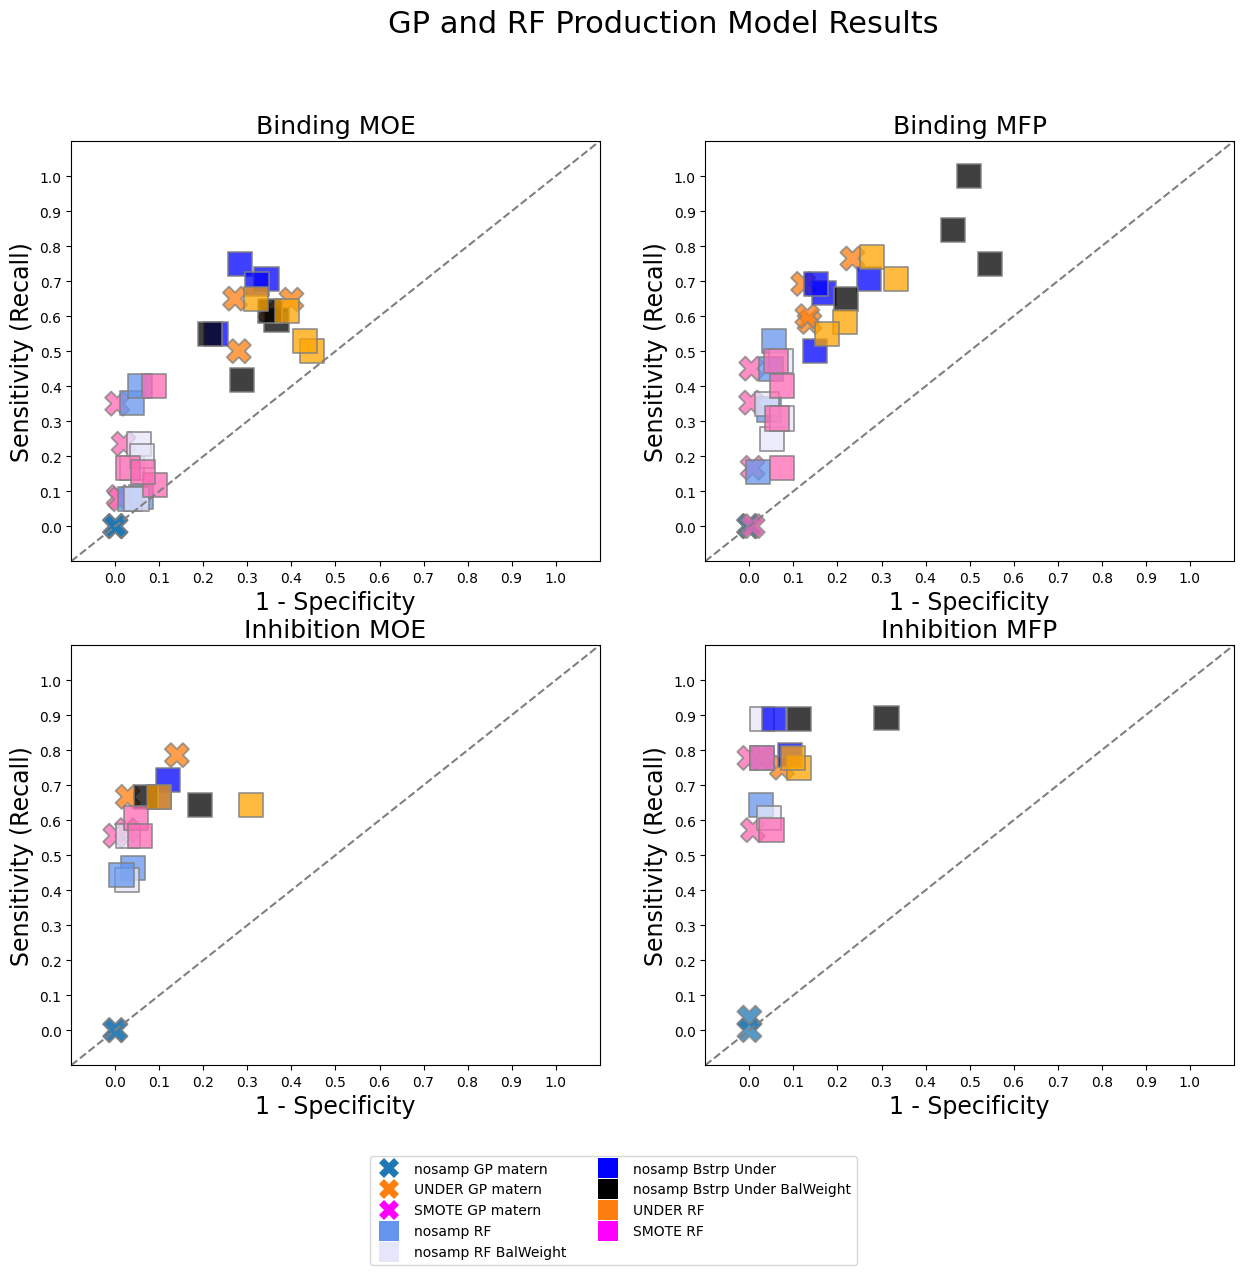

In [13]:
gp=gp[gp['modeling_type']!='GP_RBF']
full_df = pd.concat([gp, total_rf ])
print(full_df.shape)

full_df['nek type']=full_df['nek type'].replace('binding', 'Binding')
full_df['nek type']=full_df['nek type'].replace('inhibition', 'Inhibition')
all_bind = full_df[full_df['nek type'] == 'Binding'] 
all_inhib = full_df[full_df['nek type'] == 'Inhibition'] 

fig, axs = plt.subplots(2,2, figsize=(15,12))
from matplotlib.lines import Line2D
for i, this_df in enumerate(list([all_bind, all_inhib])): 
    moe_df =this_df[this_df['feat_type'] == 'MOE']
    mfp_df = this_df[this_df['feat_type'] == 'MFP']
    plt.suptitle('GP and RF Production Model Results',fontsize=22, x=0.52, y=0.99)
    sns.scatterplot(data=moe_df, x='1-specificity', y='recall', hue='strategy',style='modeling_type', markers=model_types_dict,
                   alpha=0.75,s=300, palette=samp_palette,edgecolor='gray', ax=axs[i,0])
    sns.scatterplot(data=mfp_df, x='1-specificity', y='recall', hue='strategy',style='modeling_type', markers=model_types_dict,
                   alpha=0.75,s=300, palette=samp_palette,legend=True, ax=axs[i,1],edgecolor='gray')
    for j in range(2):  
        axs[i, j].plot([-0.1, 1.1], [-0.1, 1.1], linestyle='--', color='gray')
        axs[i, j].set_xlabel('1 - Specificity', fontsize=17)
        axs[i, j].set_ylabel('Sensitivity (Recall)', fontsize=17)
        axs[i, j].set_xlim(-0.1, 1.1)
        axs[i, j].set_ylim(-0.1, 1.1)
        axs[i, j].set_xticks(np.arange(0, 1.1, 0.1))
        axs[i, j].set_yticks(np.arange(0, 1.1, 0.1))
        axs[i, j].legend_.remove()
    
    axs[i, 0].set_title(f'{moe_df["nek type"].iloc[0]} MOE', fontsize=18)
    axs[i, 1].set_title(f'{mfp_df["nek type"].iloc[0]} MFP', fontsize=18)
   
    raw_RF_BCW = Line2D([0], [0], color='lavender', marker='s', markersize=15, linestyle='None', markerfacecolor='lavender', markeredgewidth=0, label='nosamp RF BalWeight')
    raw_BRFC = Line2D([0], [0], color='blue', marker='s', markersize=15, linestyle='None', markerfacecolor='blue', markeredgewidth=0, label='nosamp Bstrp Under')
    raw_BRFC_BCW = Line2D([0], [0], color='black', marker='s', markersize=15, linestyle='None', markerfacecolor='black', markeredgewidth=0, label='nosamp Bstrp Under BalWeight')
    UNDER_RF = Line2D([0], [0], color='tab:orange', marker='s', markersize=15, linestyle='None', markerfacecolor='tab:orange', markeredgewidth=0, label='UNDER RF')
    ADASYN_RF = Line2D([0], [0], color='tab:red', marker='s', markersize=15, linestyle='None', markerfacecolor='tab:red', markeredgewidth=0, label='ADASYN RF')
    raw_RF =  Line2D([0], [0], color='cornflowerblue', marker='s', markersize=15, linestyle='None', markerfacecolor='cornflowerblue', markeredgewidth=0, label='nosamp RF')
    UNDER_GP_matern = Line2D([0],[0], color='tab:orange', marker='X', markersize=15, linestyle='None', markerfacecolor='tab:orange', markeredgewidth=0, label='UNDER GP matern')
    UNDER_GP_RBF = Line2D([0],[0], color='tab:orange', marker='o', markersize=15, linestyle='None', markerfacecolor='tab:orange', markeredgewidth=0, label='UNDER GP RBF')
    ADASYN_GP_matern = Line2D([0], [0], color='tab:red', marker='X', markersize=15, linestyle='None', markerfacecolor='tab:red', markeredgewidth=0, label='ADASYN GP matern')
    ADASYN_GP_RBF = Line2D([0], [0], color='tab:red', marker='o', markersize=15, linestyle='None', markerfacecolor='tab:red', markeredgewidth=0, label='ADASYN GP RBF')
    SMOTE_RF = Line2D([0], [0], color='magenta', marker='s', markersize=15, linestyle='None', markerfacecolor='magenta', markeredgewidth=0, label='SMOTE RF')
    SMOTE_GP_matern = Line2D([0], [0], color='magenta', marker='X', markersize=15, linestyle='None', markerfacecolor='magenta', markeredgewidth=0, label='SMOTE GP matern')
    SMOTE_GP_RBF = Line2D([0], [0], color='magenta', marker='o', markersize=15, linestyle='None', markerfacecolor='magenta', markeredgewidth=0, label='SMOTE GP RBF')
    no_samp_GP_matern = Line2D([0], [0], color='tab:blue', marker='X', markersize=15, linestyle='None', markerfacecolor='tab:blue', markeredgewidth=0, label='nosamp GP matern')
    no_samp_GP_RBF = Line2D([0], [0], color='tab:blue', marker='o', markersize=15, linestyle='None', markerfacecolor='tab:blue', markeredgewidth=0, label='nosamp GP RBF')
   
    axs[1,1].legend(handles=[no_samp_GP_matern,UNDER_GP_matern,SMOTE_GP_matern,
                             raw_RF,raw_RF_BCW,raw_BRFC, raw_BRFC_BCW, UNDER_RF,SMOTE_RF], ncols=2, bbox_to_anchor=(.3, -.2) )

    plt.savefig(f'RF_GP_prod_results.png',bbox_inches='tight')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

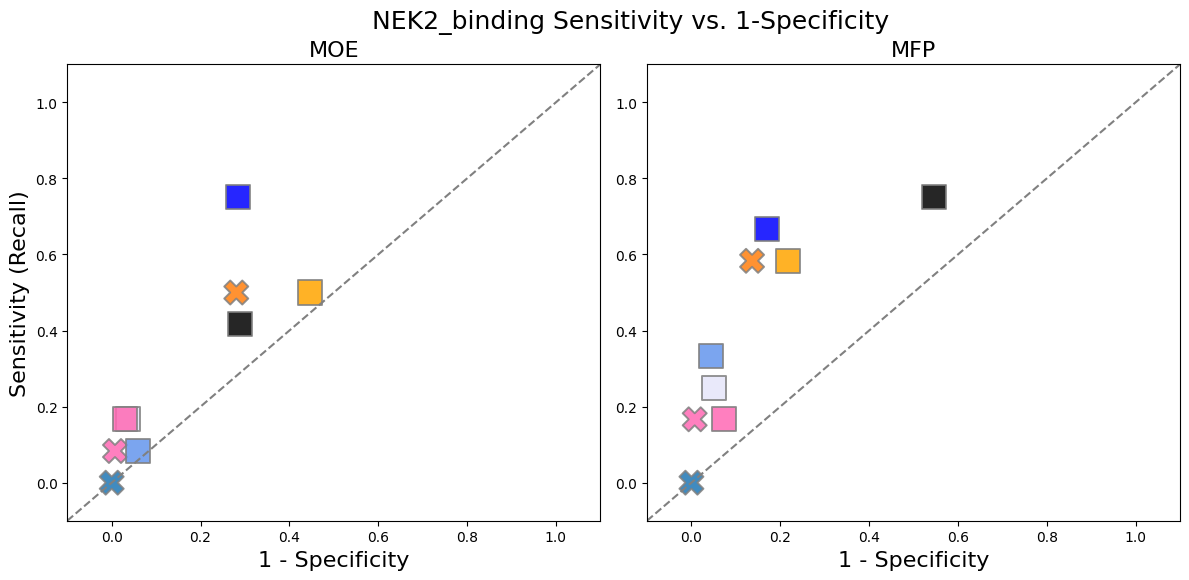

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

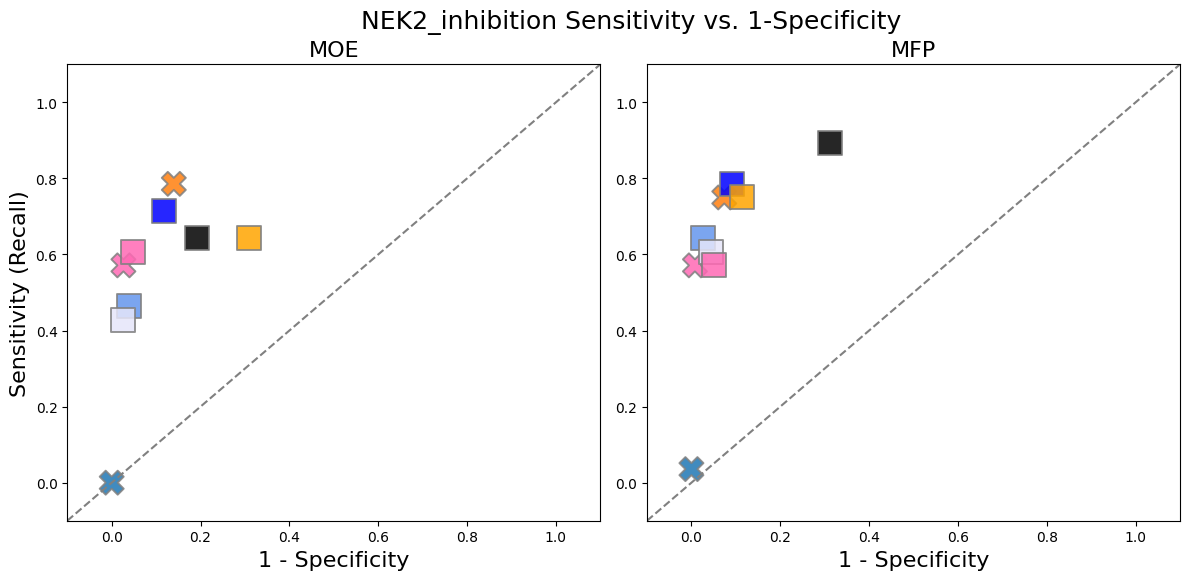

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

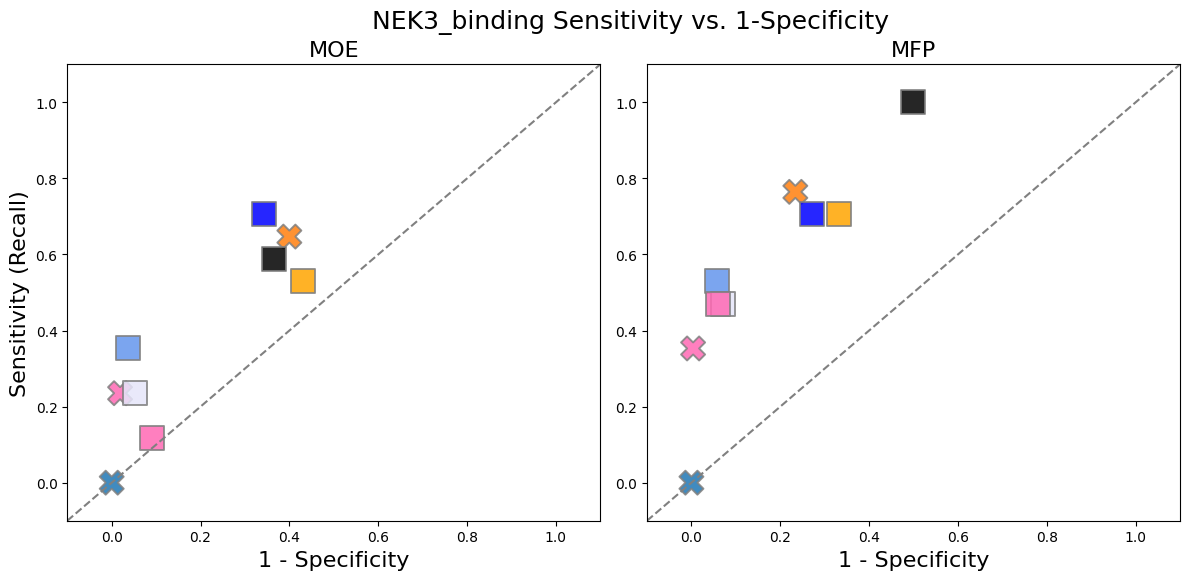

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

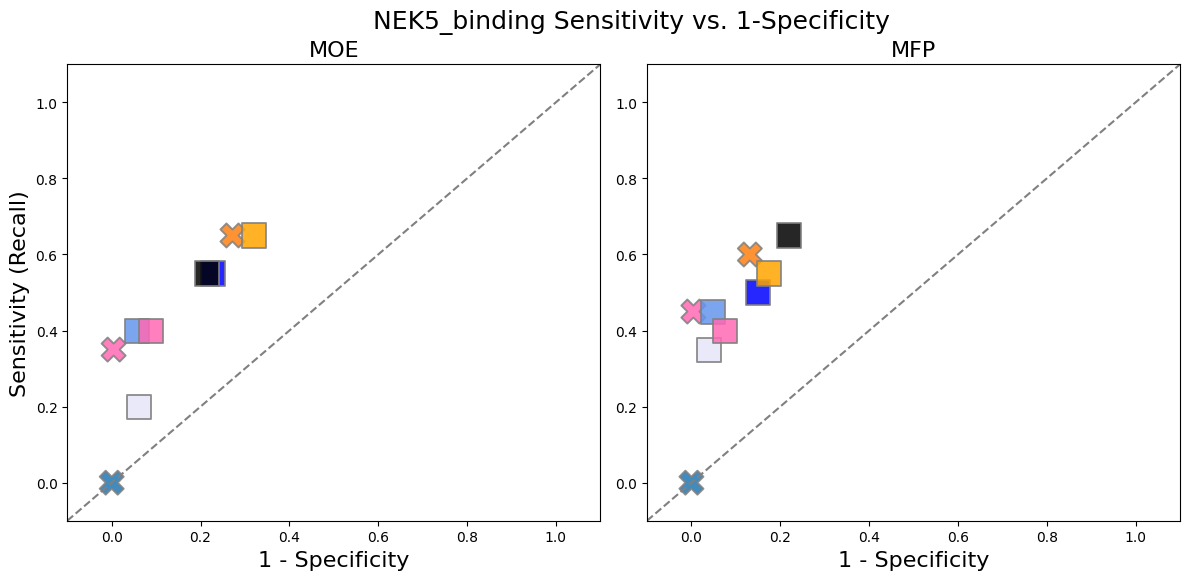

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

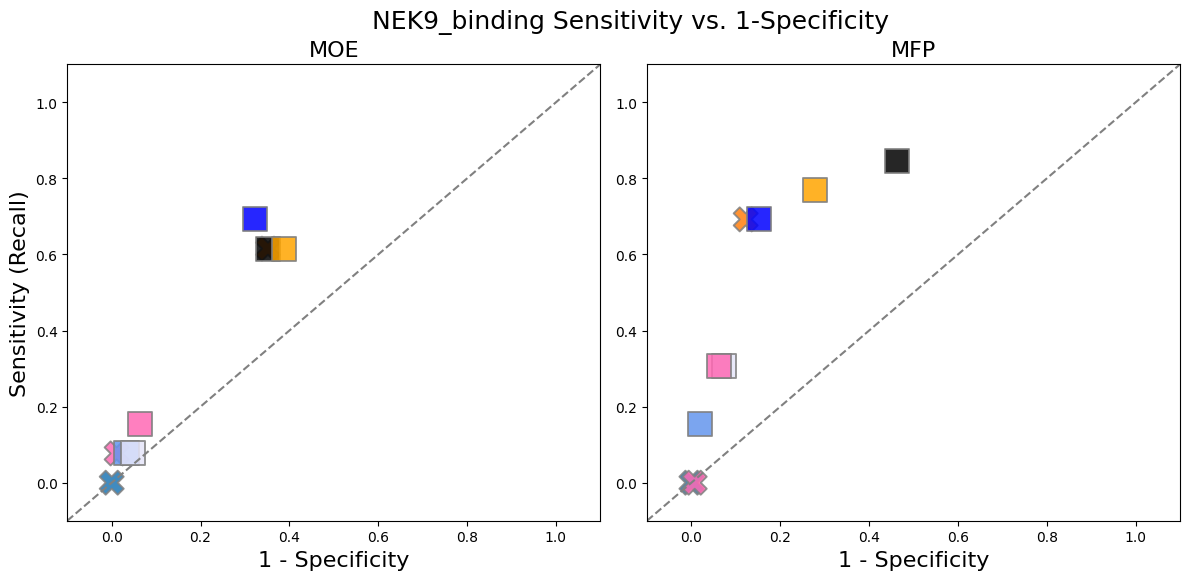

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

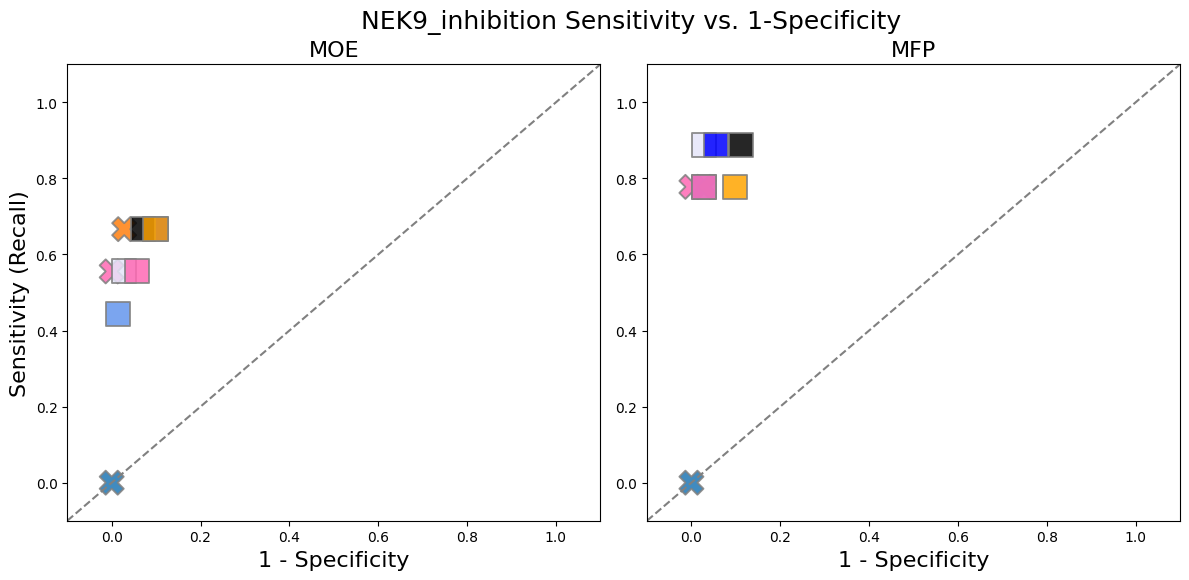

In [172]:
plots = '/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/paper/plots/'
for nek in full_df['NEK'].unique():
    fig, axs = plt.subplots(1,2, figsize=(12,6))
    nek_df = full_df[full_df['NEK']==nek] 
    moe_df = nek_df[nek_df['feat_type']=='MOE'] 
    mfp_df =nek_df[nek_df['feat_type']=='MFP'] 
    sns.scatterplot(data=moe_df, x='1-specificity', y='recall', hue='strategy',style='modeling_type', markers=model_types_dict,
                   alpha=0.85,s=300, palette=samp_palette,edgecolor='gray', ax=axs[0])
    sns.scatterplot(data=mfp_df, x='1-specificity', y='recall', hue='strategy',style='modeling_type', markers=model_types_dict,
                   alpha=0.85,s=300, palette=samp_palette,legend=True, ax=axs[1],edgecolor='gray')
    
    plt.suptitle(f'{nek} Sensitivity vs. 1-Specificity', fontsize=18, x=0.53, y =.96)
    axs[0].set_ylabel('Sensitivity (Recall)', fontsize=16)
    axs[1].set_ylabel('')
    for i, ax in enumerate(axs): 
        axs[i].plot([-0.1, 1.1],[-0.1,1.1], linestyle='--', color='gray')
        axs[i].set_xlim(-0.1, 1.1)
        axs[i].set_ylim(-0.1, 1.1)
        axs[i].set_xlabel('1 - Specificity', fontsize=16)
        
        axs[i].get_legend().remove()
        
    axs[0].set_title(f'MOE', fontsize=16)
    axs[1].set_title(f'MFP', fontsize=16)
    # axs[1].legend(ncols=1, bbox_to_anchor=(1.45, 0.78))
    plt.tight_layout()
    plt.savefig(f'{plots}{nek}.png',bbox_inches='tight')

    plt.show();

In [15]:
samp_palette

{'no_sampling': 'tab:blue',
 'UNDER': 'tab:orange',
 'SMOTE': 'hotpink',
 'ADASYN': 'tab:red',
 'no_sampling_RF': 'cornflowerblue',
 'no_sampling_RF_BCW': 'lavender',
 'UNDER_RF': 'orange',
 'no_sampling_BRFC': 'blue',
 'SMOTE_RF': 'hotpink',
 'ADASYN_RF': 'red',
 'no_sampling_BRFC_BCW': 'black',
 'no_sampling_GP_RBF': 'cornflowerblue',
 'UNDER_GP_RBF': 'orange',
 'SMOTE_GP_RBF': 'hotpink',
 'ADASYN_GP_RBF': 'red',
 'no_sampling_GP_matern': 'cornflowerblue',
 'UNDER_GP_matern': 'orange',
 'SMOTE_GP_matern': 'hotpink',
 'ADASYN_GP_matern': 'red'}

# average 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

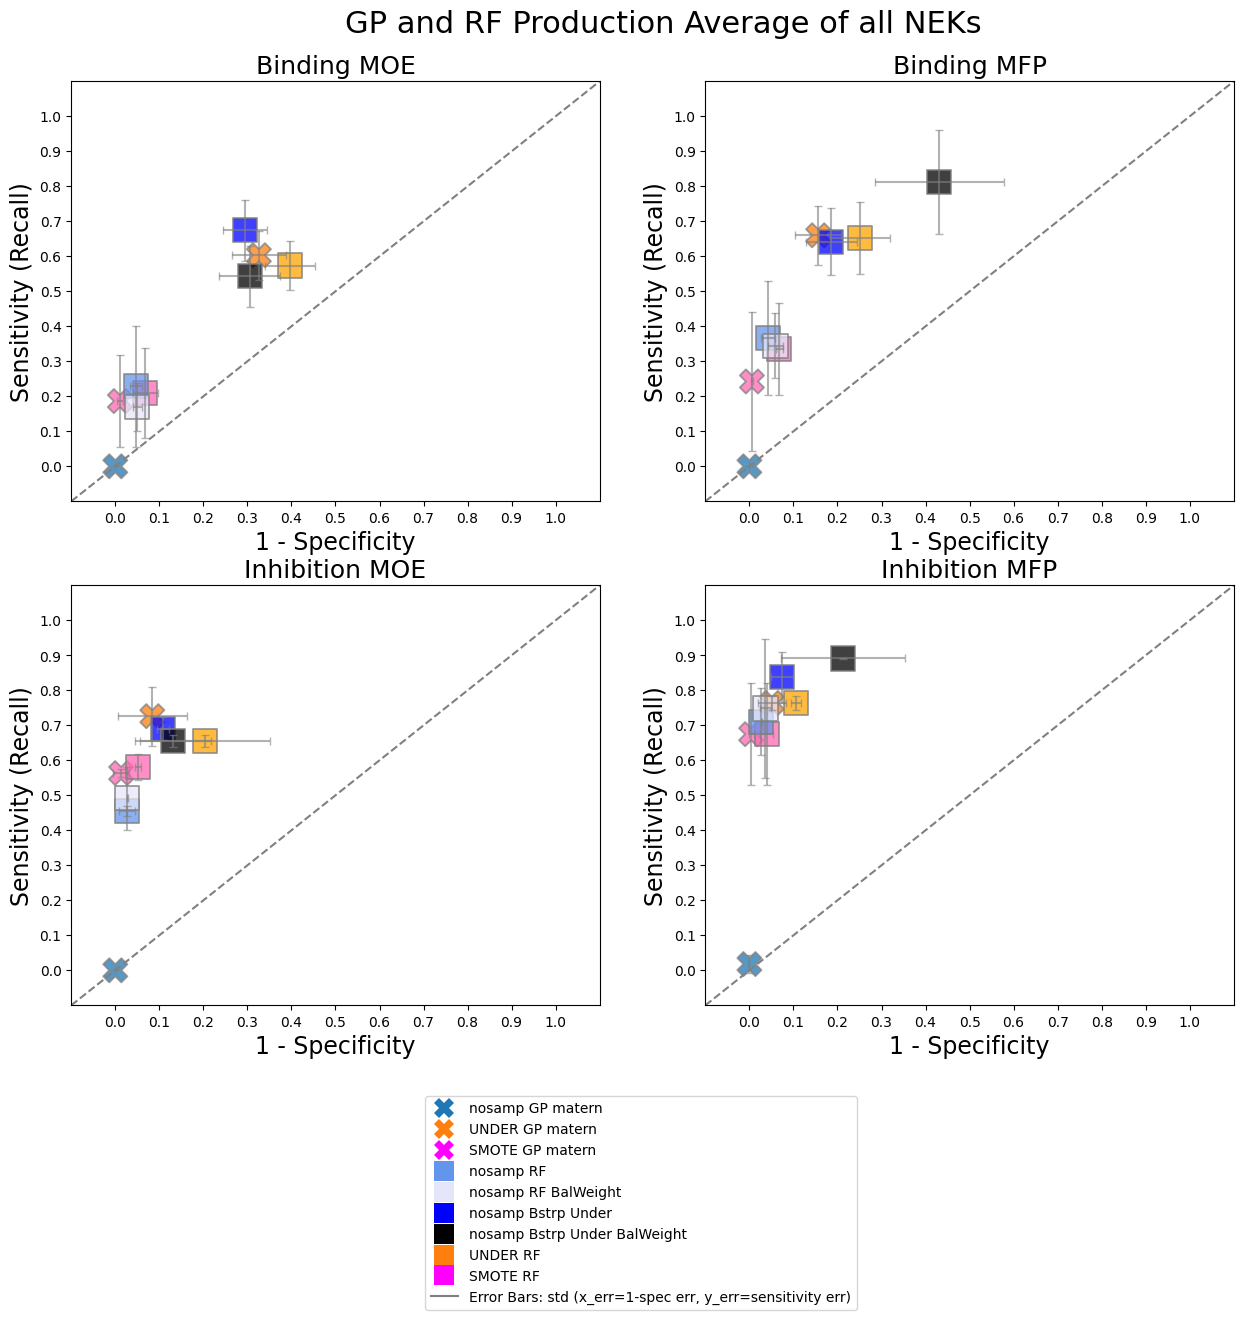

In [19]:

fig, axs = plt.subplots(2,2, figsize=(15,12))
for i, this_df in enumerate(list([all_bind, all_inhib])): 
    moe_df =this_df[this_df['feat_type'] == 'MOE']
    mfp_df = this_df[this_df['feat_type'] == 'MFP']
    moe_avg=moe_df.groupby(['feat_type', 'strategy', 'modeling_type'])[['recall', '1-specificity']].mean()
    mfp_avg=mfp_df.groupby(['feat_type', 'strategy', 'modeling_type'])[['recall', '1-specificity']].mean()
    moe_std = moe_df.groupby(['feat_type', 'strategy', 'modeling_type' ])[['recall', '1-specificity']].std().reset_index()
    mfp_std = mfp_df.groupby(['feat_type', 'strategy', 'modeling_type'])[['recall', '1-specificity']].std().reset_index()
    
    plt.suptitle('GP and RF Production Average of all NEKs',fontsize=22, x=0.52, y=0.94)
    sns.scatterplot(data=moe_avg, x='1-specificity', y='recall', hue='strategy',style='modeling_type', markers=model_types_dict,
                   alpha=0.75,s=300, palette=samp_palette,edgecolor='gray', ax=axs[i,0])
    axs[i, 0].errorbar(x=moe_avg['1-specificity'], y=moe_avg['recall'],
                       xerr=moe_std['1-specificity'], yerr=moe_std['recall'],
                       fmt='none', ecolor='gray', alpha=0.6, capsize=3, label='std')
    sns.scatterplot(data=mfp_avg, x='1-specificity', y='recall', hue='strategy',style='modeling_type', markers=model_types_dict,
                   alpha=0.75,s=300, palette=samp_palette,legend=True, ax=axs[i,1],edgecolor='gray')
    axs[i,1].errorbar(x=mfp_avg['1-specificity'], y=mfp_avg['recall'],
                       xerr=mfp_std['1-specificity'], yerr=mfp_std['recall'],
                       fmt='none', ecolor='gray', alpha=0.6, capsize=3, label='std')
    for j in range(2):  
        axs[i, j].plot([-0.1, 1.1], [-0.1, 1.1], linestyle='--', color='gray')
        axs[i, j].set_xlabel('1 - Specificity', fontsize=17)
        axs[i, j].set_ylabel('Sensitivity (Recall)', fontsize=17)
        axs[i, j].set_xlim(-0.1, 1.1)
        axs[i, j].set_ylim(-0.1, 1.1)
        axs[i, j].set_xticks(np.arange(0, 1.1, 0.1))
        axs[i, j].set_yticks(np.arange(0, 1.1, 0.1))
        axs[i, j].legend_.remove()
    
    axs[i, 0].set_title(f'{moe_df["nek type"].iloc[0]} MOE', fontsize=18)
    axs[i, 1].set_title(f'{mfp_df["nek type"].iloc[0]} MFP', fontsize=18)
   
    raw_RF_BCW = Line2D([0], [0], color='lavender', marker='s', markersize=15, linestyle='None', markerfacecolor='lavender', markeredgewidth=0, label='nosamp RF BalWeight')
    raw_BRFC = Line2D([0], [0], color='blue', marker='s', markersize=15, linestyle='None', markerfacecolor='blue', markeredgewidth=0, label='nosamp Bstrp Under')
    raw_BRFC_BCW = Line2D([0], [0], color='black', marker='s', markersize=15, linestyle='None', markerfacecolor='black', markeredgewidth=0, label='nosamp Bstrp Under BalWeight')
    UNDER_RF = Line2D([0], [0], color='tab:orange', marker='s', markersize=15, linestyle='None', markerfacecolor='tab:orange', markeredgewidth=0, label='UNDER RF')
    ADASYN_RF = Line2D([0], [0], color='tab:red', marker='s', markersize=15, linestyle='None', markerfacecolor='tab:red', markeredgewidth=0, label='ADASYN RF')
    raw_RF =  Line2D([0], [0], color='cornflowerblue', marker='s', markersize=15, linestyle='None', markerfacecolor='cornflowerblue', markeredgewidth=0, label='nosamp RF')
    UNDER_GP_matern = Line2D([0],[0], color='tab:orange', marker='X', markersize=15, linestyle='None', markerfacecolor='tab:orange', markeredgewidth=0, label='UNDER GP matern')
    UNDER_GP_RBF = Line2D([0],[0], color='tab:orange', marker='o', markersize=15, linestyle='None', markerfacecolor='tab:orange', markeredgewidth=0, label='UNDER GP RBF')
    ADASYN_GP_matern = Line2D([0], [0], color='tab:red', marker='X', markersize=15, linestyle='None', markerfacecolor='tab:red', markeredgewidth=0, label='ADASYN GP matern')
    ADASYN_GP_RBF = Line2D([0], [0], color='tab:red', marker='o', markersize=15, linestyle='None', markerfacecolor='tab:red', markeredgewidth=0, label='ADASYN GP RBF')
    SMOTE_RF = Line2D([0], [0], color='magenta', marker='s', markersize=15, linestyle='None', markerfacecolor='magenta', markeredgewidth=0, label='SMOTE RF')
    SMOTE_GP_matern = Line2D([0], [0], color='magenta', marker='X', markersize=15, linestyle='None', markerfacecolor='magenta', markeredgewidth=0, label='SMOTE GP matern')
    SMOTE_GP_RBF = Line2D([0], [0], color='magenta', marker='o', markersize=15, linestyle='None', markerfacecolor='magenta', markeredgewidth=0, label='SMOTE GP RBF')
    no_samp_GP_matern = Line2D([0], [0], color='tab:blue', marker='X', markersize=15, linestyle='None', markerfacecolor='tab:blue', markeredgewidth=0, label='nosamp GP matern')
    no_samp_GP_RBF = Line2D([0], [0], color='tab:blue', marker='o', markersize=15, linestyle='None', markerfacecolor='tab:blue', markeredgewidth=0, label='nosamp GP RBF')
    err_legend = Line2D([0],[0], color='gray', linestyle='-', linewidth=1.5, label='Error Bars: std (x_err=1-spec err, y_err=sensitivity err)')

    axs[1,1].legend(handles=[no_samp_GP_matern,UNDER_GP_matern, SMOTE_GP_matern,
                             raw_RF,raw_RF_BCW,raw_BRFC, raw_BRFC_BCW, UNDER_RF,SMOTE_RF,err_legend], ncols=1, bbox_to_anchor=(.3, -.2) )

    plt.savefig(f'RF_GP_prod_avg.png',bbox_inches='tight')

In [145]:
plotting_test = full_df.copy() 
# plotting_test=plotting_test[plotting_test['strategy']=='no_sampling']
# for nek in plotting_test['NEK'].unique():
#     fig, axs = plt.subplots(1,2, figsize=(12,6))
#     nek_df = plotting_test[plotting_test['NEK']==nek] 
#     moe_df = nek_df[nek_df['feat_type']=='MOE'] 
#     mfp_df =nek_df[nek_df['feat_type']=='MFP'] 
#     sns.scatterplot(data=moe_df, x='1-specificity', y='recall', hue='strategy',style='modeling_type', markers=model_types_dict,
#                    alpha=0.75,s=300, palette=samp_palette,edgecolor='gray', ax=axs[0])
#     sns.scatterplot(data=mfp_df, x='1-specificity', y='recall', hue='strategy',style='modeling_type', markers=model_types_dict,
#                    alpha=0.75,s=300, palette=samp_palette,legend=True, ax=axs[1],edgecolor='gray')
    
#     plt.suptitle(f'{nek} Results Sensitivity vs. 1-Specificity', fontsize=18, x=0.46, y =.96)
#     for i, ax in enumerate(axs): 
#         axs[i].plot([-0.1, 1.1],[-0.1,1.1], linestyle='--', color='gray')
#         axs[i].set_xlim(-0.1, 1.1)
#         axs[i].set_ylim(-0.1, 1.1)
#         axs[i].set_xlabel('1 - Specificity', fontsize=16)
#         axs[i].set_ylabel('Sensitivity (Recall)', fontsize=16)
#         axs[i].get_legend().remove()
        
#     axs[0].set_title(f'MOE', fontsize=16)
#     axs[1].set_title(f'MFP', fontsize=16)
#     axs[1].legend(ncols=1, bbox_to_anchor=(1.45, 0.78))
#     plt.tight_layout()

In [135]:
plotting_test

,model,NEK,strategy,feat_type,cm,recall,specificity,accuracy,precision,f1,ROC_AUC,MCC,balanced_accuracy,modeling_type,set,1-specificity,nek type,model version,RF_type
1,NEK2_binding_MOE_none_scaled_matern,NEK2_binding,no_sampling,MOE,"[271, 0, 12, 0]",0.000000,1.000000,0.957597,0.000000,0.000000,0.500000,0.000000,0.500000,GP_matern,prod,0.000000,Binding,GP_matern,NaN
3,NEK2_binding_MOE_UNDER_matern,NEK2_binding,UNDER,MOE,"[195, 76, 6, 6]",0.500000,0.719557,0.710247,0.073171,0.127660,0.609779,0.097525,0.609779,GP_matern,prod,0.280443,Binding,GP_matern,NaN
5,NEK2_binding_MOE_SMOTE_matern,NEK2_binding,SMOTE,MOE,"[269, 2, 11, 1]",0.083333,0.992620,0.954064,0.333333,0.133333,0.537977,0.149445,0.537977,GP_matern,prod,0.007380,Binding,GP_matern,NaN
9,NEK2_binding_MFP_none_scaled_matern,NEK2_binding,no_sampling,MFP,"[271, 0, 12, 0]",0.000000,1.000000,0.957597,0.000000,0.000000,0.500000,0.000000,0.500000,GP_matern,prod,0.000000,Binding,GP_matern,NaN
11,NEK2_binding_MFP_UNDER_matern,NEK2_binding,UNDER,MFP,"[234, 37, 5, 7]",0.583333,0.863469,0.851590,0.159091,0.250000,0.723401,0.248465,0.723401,GP_matern,prod,0.136531,Binding,GP_matern,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,NEK9_binding_MFP_SMOTE_RF,NEK9_binding,SMOTE_RF,MFP,"[253, 17, 9, 4]",0.307692,0.937037,0.908127,0.190476,0.235294,0.622365,0.195470,0.622365,RF,prod,0.062963,Binding,RF,RF
164,NEK9_inhibition_MOE_UNDER_RF,NEK9_inhibition,UNDER_RF,MOE,"[64, 7, 3, 6]",0.666667,0.901408,0.875000,0.461538,0.545455,0.784038,0.486572,0.784038,RF,prod,0.098592,Inhibition,RF,RF
168,NEK9_inhibition_MOE_SMOTE_RF,NEK9_inhibition,SMOTE_RF,MOE,"[67, 4, 4, 5]",0.555556,0.943662,0.900000,0.555556,0.555556,0.749609,0.499218,0.749609,RF,prod,0.056338,Inhibition,RF,RF
180,NEK9_inhibition_MFP_UNDER_RF,NEK9_inhibition,UNDER_RF,MFP,"[64, 7, 2, 7]",0.777778,0.901408,0.887500,0.500000,0.608696,0.839593,0.564811,0.839593,RF,prod,0.098592,Inhibition,RF,RF


In [136]:
plotting_test['modeling_type'].unique()
just_rf 

array(['GP_matern', 'RF'], dtype=object)

In [169]:
ratio_df

,NEK,feat_type,strategy,total_samples,total actives,total_actives%,train_active%,test_active%
0,NEK2_binding,MOE,no_sampling,1408,57,4.048295,4.000000,4.240283
1,NEK2_binding,MOE,UNDER,373,57,15.281501,50.000000,4.240283
2,NEK2_binding,MOE,SMOTE,2443,1092,44.699140,50.000000,4.240283
3,NEK2_binding,MOE,ADASYN,2445,1094,44.744376,50.046253,4.240283
4,NEK2_binding,MFP,no_sampling,1408,57,4.048295,4.000000,4.240283
5,NEK2_binding,MFP,UNDER,373,57,15.281501,50.000000,4.240283
6,NEK2_binding,MFP,SMOTE,2443,1092,44.699140,50.000000,4.240283
7,NEK2_binding,MFP,ADASYN,2438,1087,44.585726,49.883991,4.240283
8,NEK2_inhibition,MOE,no_sampling,2032,140,6.889764,6.892308,6.879607
9,NEK2_inhibition,MOE,UNDER,631,140,22.187005,50.000000,6.879607


<IPython.core.display.Javascript object>

/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_32240/3629421293.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['strategy']=filtered['strategy'].replace('SMOTE_RF', 'SMOTE')
/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_32240/3629421293.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['strategy']=filtered['strategy'].replace('UNDER_RF', 'UNDER')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

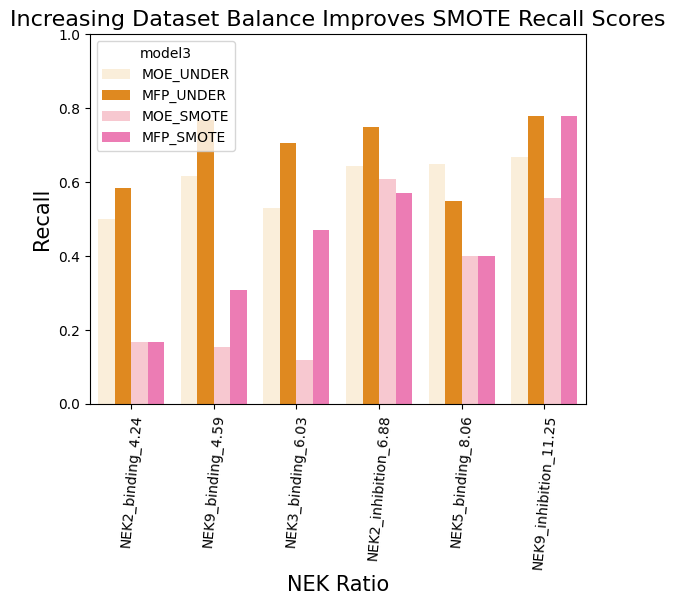

In [218]:
ratio_df = pd.read_csv('/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/paper/dataset_creation/NEK_ratios.csv')
ratio_df=ratio_df.replace('none_scaled', 'no_sampling')
ratio_df=ratio_df.round(2)
just_rf = plotting_test[plotting_test['RF_type'] == 'RF']
filtered = just_rf[(just_rf['strategy'] == 'SMOTE_RF') | (just_rf['strategy']=='UNDER_RF')]
# filtered = just_rf[just_rf['strategy'] == 'SMOTE_RF']
filtered['strategy']=filtered['strategy'].replace('SMOTE_RF', 'SMOTE')
filtered['strategy']=filtered['strategy'].replace('UNDER_RF', 'UNDER')
plotting_df = filtered.merge(ratio_df, on=['NEK', 'strategy'])

plotting_df=plotting_df.sort_values('test_active%')
plotting_df['NEK_ratio'] = plotting_df['NEK'].astype(str)+'_'+plotting_df['test_active%'].astype(str)
plotting_df['model2'] = plotting_df['feat_type_x'].astype(str)+'_'+plotting_df['strategy']+'_'+plotting_df['NEK_ratio']
plotting_df['model3'] =plotting_df['feat_type_x'].astype(str)+'_'+plotting_df['strategy']
metric_cols = ['recall', '1-specificity','NEK', 'test_active%']

dflong = pd.melt(plotting_df, id_vars=['strategy','NEK', 'feat_type_x', 'test_active%', 'model3', 'model2', 
                        'NEK_ratio'], value_vars=['recall'], 
                 var_name='Metric', value_name='Metric_value')
fig, ax = plt.subplots() 
sns.barplot(data=dflong,x='NEK_ratio', y='Metric_value' ,hue='model3', palette=pal3)
plt.ylabel('Recall',fontsize=15)
plt.xlabel('NEK Ratio', fontsize=15)
plt.xticks(rotation = 85)
plt.ylim(0,1)
plt.title('Increasing Dataset Balance Improves SMOTE Recall Scores',fontsize=16)
plt.savefig('Increasing_Dataset_Balance_Improves_SMOTE_Recall_Scores.png',bbox_inches='tight')
plt.show();


In [252]:

pal3={'MOE_UNDER':'bisque', 'MOE_SMOTE':'pink', 'MFP_UNDER':'darkorange' , 'MFP_SMOTE': 'hotpink',
     'MOE_UNDER_GP_matern': 'palegoldenrod', 'MFP_UNDER_GP_matern': 'gold', 
     'MOE_UNDER_RF': 'bisque', 'MFP_UNDER_RF': 'darkorange', 
     'MOE_SMOTE_GP_matern': 'thistle', 'MFP_SMOTE_GP_matern': 'violet',
    'MFP_SMOTE_RF':'hotpink' , 'MOE_SMOTE_RF': 'pink'}

<IPython.core.display.Javascript object>

/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_32240/3511876648.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['strategy']=filtered['strategy'].replace('SMOTE_RF', 'SMOTE')
/var/folders/wb/cvnnx9qn3tj18cq5_9wx39xm0000gn/T/ipykernel_32240/3511876648.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['strategy']=filtered['strategy'].replace('UNDER_RF', 'UNDER')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

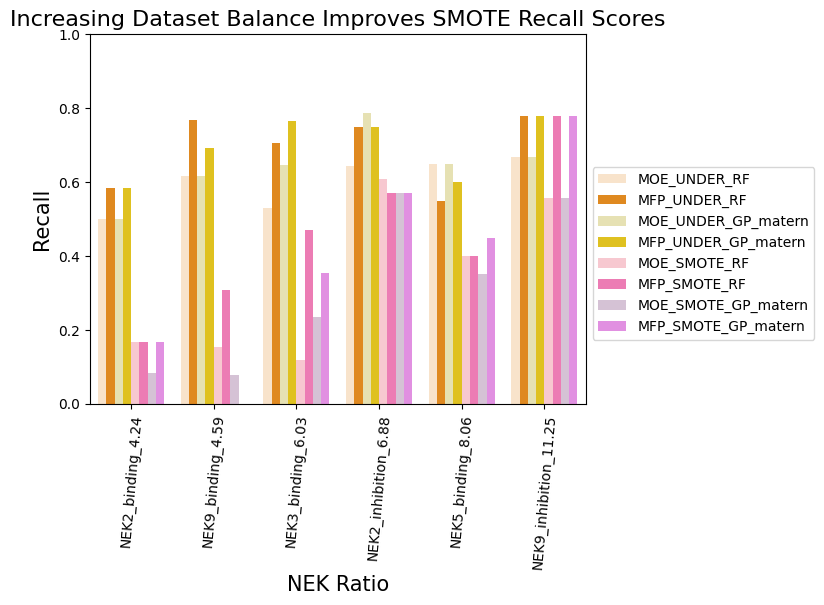

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

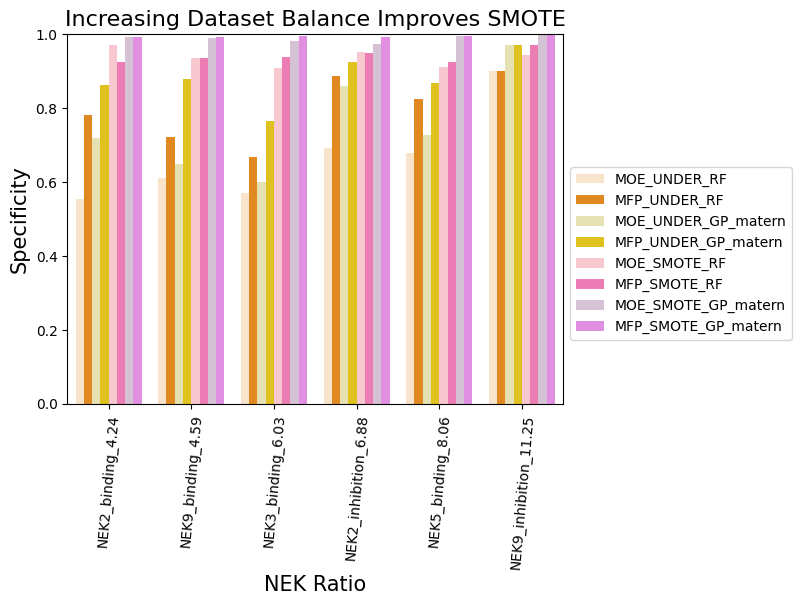

In [259]:
ratio_df = pd.read_csv('/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/paper/dataset_creation/NEK_ratios.csv')
ratio_df=ratio_df.replace('none_scaled', 'no_sampling')
ratio_df=ratio_df.round(2)
gps = plotting_test[plotting_test['modeling_type']=='GP_matern']
gp_uo=gps[(gps['strategy']=='SMOTE')|(gps['strategy']=='UNDER')]
just_rf = plotting_test[plotting_test['RF_type'] == 'RF']
filtered = just_rf[(just_rf['strategy'] == 'SMOTE_RF') | (just_rf['strategy']=='UNDER_RF')]
# filtered = just_rf[just_rf['strategy'] == 'SMOTE_RF']
filtered['strategy']=filtered['strategy'].replace('SMOTE_RF', 'SMOTE')
filtered['strategy']=filtered['strategy'].replace('UNDER_RF', 'UNDER')
os_us = pd.concat([gp_uo, filtered])
plotting_df = os_us.merge(ratio_df, on=['NEK', 'strategy'])
# plotting_df=plotting_df[plotting_df['feat_type_x']!='MFP']
plotting_df=plotting_df.sort_values('test_active%')
plotting_df['NEK_ratio'] = plotting_df['NEK'].astype(str)+'_'+plotting_df['test_active%'].astype(str)
plotting_df['model2'] = plotting_df['feat_type_x'].astype(str)+'_'+plotting_df['strategy']+'_'+plotting_df['NEK_ratio']
plotting_df['model3'] =plotting_df['feat_type_x'].astype(str)+'_'+plotting_df['strategy']
plotting_df['model4']=plotting_df['feat_type_x'].astype(str)+'_'+plotting_df['strategy']+'_'+plotting_df['modeling_type']
metric_cols = ['recall', '1-specificity','NEK', 'test_active%']

dflong = pd.melt(plotting_df, id_vars=['strategy','NEK', 'feat_type_x', 'test_active%', 'model3', 'model2', 
                       'model4', 'NEK_ratio', 'specificity'], value_vars=['recall'], 
                 var_name='Metric', value_name='Metric_value')
fig, ax = plt.subplots() 
sns.barplot(data=dflong,x='NEK_ratio', y='Metric_value' ,hue='model4', palette=pal3, hue_order=['MOE_UNDER_RF', 'MFP_UNDER_RF', 
            'MOE_UNDER_GP_matern', 'MFP_UNDER_GP_matern', 'MOE_SMOTE_RF', 'MFP_SMOTE_RF', 'MOE_SMOTE_GP_matern', 'MFP_SMOTE_GP_matern'])
plt.ylabel('Recall',fontsize=15)
plt.xlabel('NEK Ratio', fontsize=15)
plt.xticks(rotation = 85)
plt.ylim(0,1)
plt.legend(bbox_to_anchor=(1, .66))
plt.title('Increasing Dataset Balance Improves SMOTE Recall Scores',fontsize=16)
plt.savefig('RF_GP_Increasing_Dataset_Balance_Improves_SMOTE_Recall_Scores.png',bbox_inches='tight')
plt.show();


dflong2 = pd.melt(plotting_df, id_vars=['strategy','NEK', 'feat_type_x', 'test_active%', 'model3', 'model2', 
                       'model4', 'NEK_ratio'], value_vars=['specificity'], 
                 var_name='Metric', value_name='Metric_value')
fig, ax = plt.subplots() 
sns.barplot(data=dflong2,x='NEK_ratio', y='Metric_value' ,hue='model4', palette=pal3, hue_order=['MOE_UNDER_RF', 'MFP_UNDER_RF', 
            'MOE_UNDER_GP_matern', 'MFP_UNDER_GP_matern', 'MOE_SMOTE_RF', 'MFP_SMOTE_RF', 'MOE_SMOTE_GP_matern', 'MFP_SMOTE_GP_matern'])
plt.ylabel('Specificity',fontsize=15)
plt.xlabel('NEK Ratio', fontsize=15)
plt.xticks(rotation = 85)
plt.ylim(0,1)
plt.legend(bbox_to_anchor=(1, .66))
plt.title('Increasing Dataset Balance Improves SMOTE',fontsize=16)
# plt.savefig('RF_GP_Increasing_Dataset_Balance_Improves_SMOTE.png',bbox_inches='tight')
plt.show();


In [140]:
# col_order =['model', 'feat_type', 'strategy','modeling_type','f1','recall','specificity','distance', 'fbeta_2','balanced_accuracy', '1-specificity','MCC','f1']
import math 
beta_a=2 
beta_b=1.8
full_df['distance'] = np.sqrt((0-full_df['1-specificity'])**2 + (1-full_df['recall'])**2)
full_df['fbeta_2']=((1+(beta_a**2))*full_df['precision']*full_df['recall'])/((beta_a**2)*full_df['precision'])+full_df['recall']
full_df['fbeta_1.8']=((1+(beta_b**2))*full_df['precision']*full_df['recall'])/((beta_b**2)*full_df['precision'])+full_df['recall']
best_bas = []
for nek in neks: 
    full_nek = full_df[full_df['NEK']==nek]
    print(nek)
    top_neks=full_nek.sort_values(['balanced_accuracy'], ascending=False).head(1)
    # display(top_neks[col_order].head(1)) 
    display(top_neks)
    best_bas.append(top_neks)
full_df.to_csv('all_prod_results_for_model_selection.csv', index=False)

<IPython.core.display.Javascript object>

NEK2_binding


,model,NEK,strategy,feat_type,cm,recall,specificity,accuracy,precision,f1,...,modeling_type,set,1-specificity,nek type,model version,RF_type,fbeta_2,distance,fbeta_1.5,fbeta_1.8
18,NEK2_binding_MFP_none_scaled_BRFC,NEK2_binding,no_sampling_BRFC,MFP,"[225, 46, 4, 8]",0.666667,0.830258,0.823322,0.148148,0.242424,...,RF,prod,0.169742,Binding,BRFC,BRFC,1.5,0.374063,1.62963,1.539095


NEK2_inhibition


,model,NEK,strategy,feat_type,cm,recall,specificity,accuracy,precision,f1,...,modeling_type,set,1-specificity,nek type,model version,RF_type,fbeta_2,distance,fbeta_1.5,fbeta_1.8
50,NEK2_inhibition_MFP_none_scaled_BRFC,NEK2_inhibition,no_sampling_BRFC,MFP,"[344, 35, 6, 22]",0.785714,0.907652,0.899263,0.385965,0.517647,...,RF,prod,0.092348,Inhibition,BRFC,BRFC,1.767857,0.233338,1.920635,1.813933


NEK3_binding


,model,NEK,strategy,feat_type,cm,recall,specificity,accuracy,precision,f1,...,modeling_type,set,1-specificity,nek type,model version,RF_type,fbeta_2,distance,fbeta_1.5,fbeta_1.8
43,NEK3_binding_MFP_UNDER_matern,NEK3_binding,UNDER,MFP,"[203, 62, 4, 13]",0.764706,0.766038,0.765957,0.173333,0.282609,...,GP_matern,prod,0.233962,Binding,GP_matern,NaN,1.720588,0.331816,1.869281,1.765432


NEK5_binding


,model,NEK,strategy,feat_type,cm,recall,specificity,accuracy,precision,f1,...,modeling_type,set,1-specificity,nek type,model version,RF_type,fbeta_2,distance,fbeta_1.5,fbeta_1.8
59,NEK5_binding_MFP_UNDER_matern,NEK5_binding,UNDER,MFP,"[198, 30, 8, 12]",0.6,0.868421,0.846774,0.285714,0.387097,...,GP_matern,prod,0.131579,Binding,GP_matern,NaN,1.35,0.421086,1.466667,1.385185


NEK9_binding


,model,NEK,strategy,feat_type,cm,recall,specificity,accuracy,precision,f1,...,modeling_type,set,1-specificity,nek type,model version,RF_type,fbeta_2,distance,fbeta_1.5,fbeta_1.8
75,NEK9_binding_MFP_UNDER_matern,NEK9_binding,UNDER,MFP,"[237, 33, 4, 9]",0.692308,0.877778,0.869258,0.214286,0.327273,...,GP_matern,prod,0.122222,Binding,GP_matern,NaN,1.557692,0.331078,1.692308,1.598291


NEK9_inhibition


,model,NEK,strategy,feat_type,cm,recall,specificity,accuracy,precision,f1,...,modeling_type,set,1-specificity,nek type,model version,RF_type,fbeta_2,distance,fbeta_1.5,fbeta_1.8
177,NEK9_inhibition_MFP_none_scaled_RF_BCW,NEK9_inhibition,no_sampling_RF_BCW,MFP,"[69, 2, 1, 8]",0.888889,0.971831,0.9625,0.8,0.842105,...,RF,prod,0.028169,Inhibition,RF_BCW,RF_BCW,2.0,0.114626,2.17284,2.052126


In [141]:
best_bas_df['nek type']
best_bas_df

,model,NEK,strategy,feat_type,cm,recall,specificity,accuracy,precision,f1,...,set,1-specificity,nek type,model version,RF_type,fbeta_2,distance,fbeta_1.5,fbeta_1.8,model name
0,NEK2_binding_MFP_none_scaled_BRFC,NEK2_binding,no_sampling_BRFC,MFP,"[225, 46, 4, 8]",0.666667,0.830258,0.823322,0.148148,0.242424,...,prod,0.169742,Binding,BRFC,BRFC,1.500000,0.374063,1.629630,1.539095,NEK2_binding no_sampling_BRFC MFP
1,NEK2_binding_MOE_none_scaled_BRFC,NEK2_binding,no_sampling_BRFC,MOE,"[194, 77, 3, 9]",0.750000,0.715867,0.717314,0.104651,0.183673,...,prod,0.284133,Binding,BRFC,BRFC,1.687500,0.378459,1.833333,1.731481,NEK2_binding no_sampling_BRFC MOE
2,NEK2_binding_MFP_UNDER_matern,NEK2_binding,UNDER,MFP,"[234, 37, 5, 7]",0.583333,0.863469,0.851590,0.159091,0.250000,...,prod,0.136531,Binding,GP_matern,NaN,1.312500,0.438465,1.425926,1.346708,NEK2_binding UNDER MFP
3,NEK2_binding_MFP_UNDER_RF,NEK2_binding,UNDER_RF,MFP,"[212, 59, 5, 7]",0.583333,0.782288,0.773852,0.106061,0.179487,...,prod,0.217712,Binding,RF,RF,1.312500,0.470117,1.425926,1.346708,NEK2_binding UNDER_RF MFP
4,NEK2_binding_MFP_none_scaled_RF,NEK2_binding,no_sampling_RF,MFP,"[259, 12, 8, 4]",0.333333,0.955720,0.929329,0.250000,0.285714,...,prod,0.044280,Binding,RF,RF,0.750000,0.668136,0.814815,0.769547,NEK2_binding no_sampling_RF MFP
5,NEK2_binding_MOE_UNDER_matern,NEK2_binding,UNDER,MOE,"[195, 76, 6, 6]",0.500000,0.719557,0.710247,0.073171,0.127660,...,prod,0.280443,Binding,GP_matern,NaN,1.125000,0.573278,1.222222,1.154321,NEK2_binding UNDER MOE
6,NEK2_binding_MFP_none_scaled_BRFC_BCW,NEK2_binding,no_sampling_BRFC_BCW,MFP,"[123, 148, 3, 9]",0.750000,0.453875,0.466431,0.057325,0.106509,...,prod,0.546125,Binding,BRFC_BCW,BRFC_BCW,1.687500,0.600627,1.833333,1.731481,NEK2_binding no_sampling_BRFC_BCW MFP
7,NEK2_binding_MFP_none_scaled_RF_BCW,NEK2_binding,no_sampling_RF_BCW,MFP,"[257, 14, 9, 3]",0.250000,0.948339,0.918728,0.176471,0.206897,...,prod,0.051661,Binding,RF_BCW,RF_BCW,0.562500,0.751777,0.611111,0.577160,NEK2_binding no_sampling_RF_BCW MFP
8,NEK2_binding_MFP_SMOTE_matern,NEK2_binding,SMOTE,MFP,"[269, 2, 10, 2]",0.166667,0.992620,0.957597,0.500000,0.250000,...,prod,0.007380,Binding,GP_matern,NaN,0.375000,0.833366,0.407407,0.384774,NEK2_binding SMOTE MFP
9,NEK2_binding_MOE_SMOTE_RF,NEK2_binding,SMOTE_RF,MOE,"[263, 8, 10, 2]",0.166667,0.970480,0.936396,0.200000,0.181818,...,prod,0.029520,Binding,RF,RF,0.375000,0.833856,0.407407,0.384774,NEK2_binding SMOTE_RF MOE


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

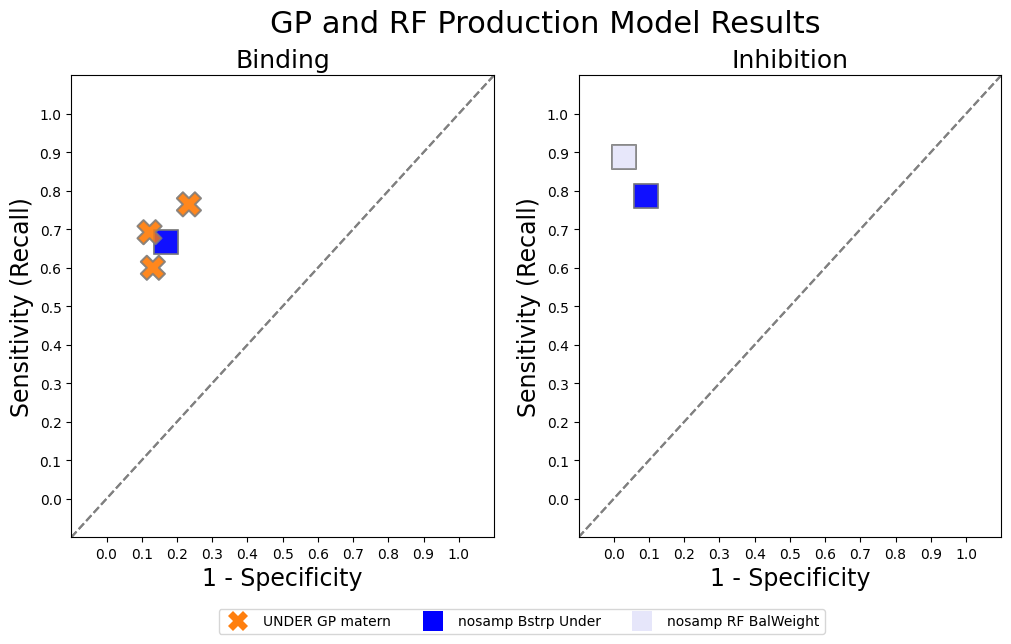

In [144]:
best_bas_df = pd.concat(best_bas, ignore_index=True)
best_bas_df
best_bas_df['model name'] = best_bas_df['NEK'].astype(str)+' '+best_bas_df['strategy']+ ' ' +best_bas_df['feat_type']
bind_ba = best_bas_df[best_bas_df['nek type'] == 'Binding'] 
inhib_ba = best_bas_df[best_bas_df['nek type'] == 'Inhibition'] 
inhib_ba


fig, axs = plt.subplots(1,2, figsize=(12,6))
for i, this_df in enumerate(list([bind_ba,inhib_ba])): 
    plt.suptitle('GP and RF Production Model Results',fontsize=22, x=0.52, y=0.99)
    sns.scatterplot(data=bind_ba, x='1-specificity', y='recall', hue='strategy',style='modeling_type', markers=model_types_dict,
                   alpha=0.75,s=300, palette=samp_palette,edgecolor='gray', ax=axs[0])
    sns.scatterplot(data=inhib_ba, x='1-specificity', y='recall', hue='strategy',style='modeling_type', markers=model_types_dict,
                   alpha=0.75,s=300, palette=samp_palette,legend=True, ax=axs[1],edgecolor='gray')
    for j in range(2):  
        axs[j].plot([-0.1, 1.1], [-0.1, 1.1], linestyle='--', color='gray')
        axs[j].set_xlabel('1 - Specificity', fontsize=17)
        axs[j].set_ylabel('Sensitivity (Recall)', fontsize=17)
        axs[j].set_xlim(-0.1, 1.1)
        axs[j].set_ylim(-0.1, 1.1)
        axs[j].set_xticks(np.arange(0, 1.1, 0.1))
        axs[j].set_yticks(np.arange(0, 1.1, 0.1))
        axs[j].legend_.remove()
    
    axs[0].set_title(f'{bind_ba["nek type"].iloc[0]}', fontsize=18)
    axs[1].set_title(f'{inhib_ba["nek type"].iloc[0]}', fontsize=18)
   
    # raw_RF_BCW = Line2D([0], [0], color='lavender', marker='s', markersize=15, linestyle='None', markerfacecolor='lavender', markeredgewidth=0, label='nosamp RF BalWeight')
    # raw_BRFC = Line2D([0], [0], color='blue', marker='s', markersize=15, linestyle='None', markerfacecolor='blue', markeredgewidth=0, label='nosamp Bstrp Under')
    # UNDER_GP_matern = Line2D([0],[0], color='tab:orange', marker='X', markersize=15, linestyle='None', markerfacecolor='tab:orange', markeredgewidth=0, label='UNDER GP matern')
    axs[1].legend(handles=[UNDER_GP_matern,raw_BRFC,raw_RF_BCW,], ncols=3, bbox_to_anchor=(.6, -.14) )

    plt.savefig(f'RF_GP_prod_best_BAs.png',bbox_inches='tight')

In [169]:
best_bas_df.to_csv('best_Balanced_Accuracy_prod.csv',index=False)

In [107]:
samp_palette

{'no_sampling': 'tab:blue',
 'UNDER': 'tab:orange',
 'SMOTE': 'hotpink',
 'ADASYN': 'tab:red',
 'no_sampling_RF': 'cornflowerblue',
 'no_sampling_RF_BCW': 'lavender',
 'UNDER_RF': 'orange',
 'no_sampling_BRFC': 'blue',
 'SMOTE_RF': 'hotpink',
 'ADASYN_RF': 'red',
 'no_sampling_BRFC_BCW': 'black',
 'no_sampling_GP_RBF': 'cornflowerblue',
 'UNDER_GP_RBF': 'orange',
 'SMOTE_GP_RBF': 'hotpink',
 'ADASYN_GP_RBF': 'red',
 'no_sampling_GP_matern': 'cornflowerblue',
 'UNDER_GP_matern': 'orange',
 'SMOTE_GP_matern': 'hotpink',
 'ADASYN_GP_matern': 'red'}

In [152]:

import matplotlib.colors as mcolors
base_or = mcolors.to_rgb('tab:orange') 
lighter_or = [mcolors.to_hex((1 - (1 - np.array(base_or)) * factor)) for factor in np.linspace(0, 1, 4)]

base_bl = mcolors.to_rgb('blue') 
lighter_bl = [mcolors.to_hex((1 - (1 - np.array(base_bl)) * factor)) for factor in np.linspace(0, 1, 2)]
palette_neks = {'NEK3_binding UNDER MFP': '#ffd4af','NEK5_binding UNDER MFP':'#ffbf86', 'NEK9_binding UNDER MFP': '#ff7f0e',
                'NEK9_inhibition no_sampling_RF_BCW MFP': 'lavender', 'NEK2_binding no_sampling_BRFC MFP':'blue',
                'NEK2_inhibition no_sampling_BRFC MFP':'blue'}
                

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [153]:
lighter_or

['#ffffff', '#ffd4af', '#ffaa5e', '#ff7f0e']

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

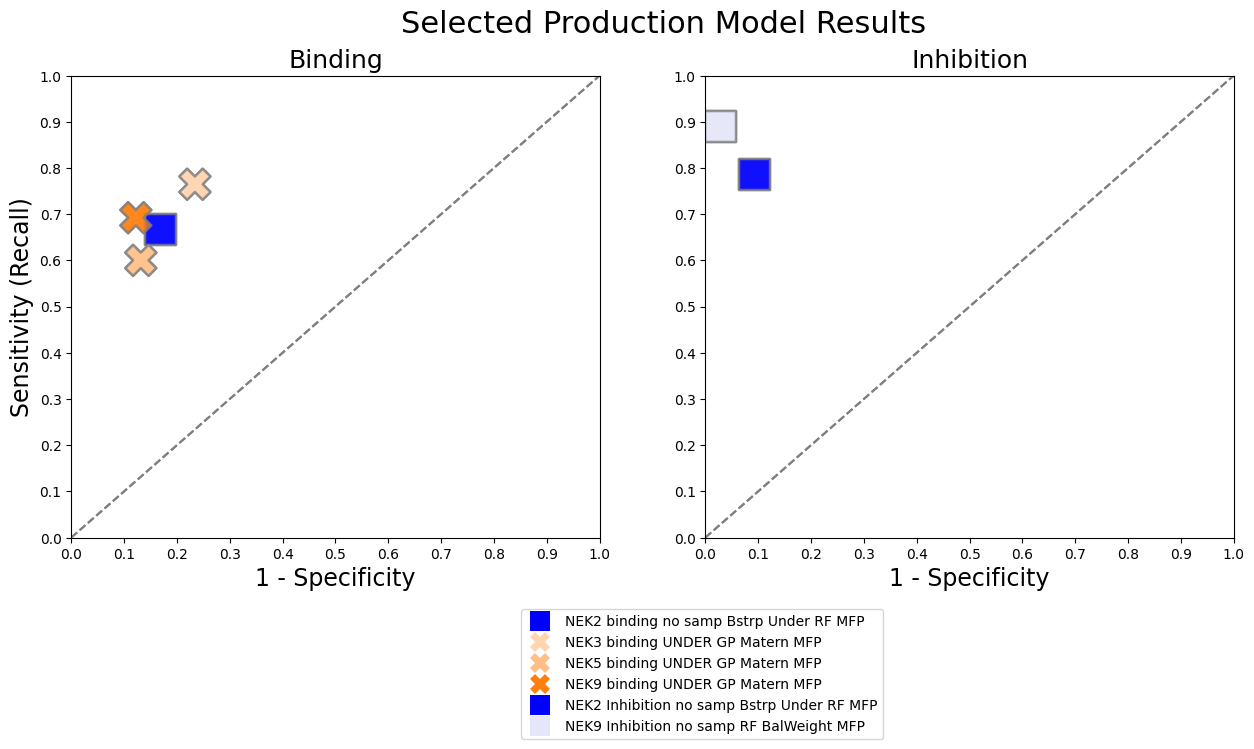

In [179]:

fig, axs = plt.subplots(1,2, figsize=(15,6))
for i, this_df in enumerate(list([bind_ba,inhib_ba])): 
    plt.suptitle('Selected Production Model Results',fontsize=22, x=0.52, y=0.99)
    sns.scatterplot(data=bind_ba, x='1-specificity', y='recall', hue='model name',style='modeling_type', markers=model_types_dict,
                   alpha=0.75,s=500, palette=palette_neks,edgecolor='gray', ax=axs[0])
    sns.scatterplot(data=inhib_ba, x='1-specificity', y='recall', hue='model name',style='modeling_type', markers=model_types_dict,
                   alpha=0.75,s=500, palette=palette_neks,legend=True, ax=axs[1],edgecolor='gray')
    axs[0].set_ylabel('Sensitivity (Recall)', fontsize=17)
    axs[1].set_ylabel('')
    for j in range(2):  
        axs[j].plot([0, 1], [0,1], linestyle='--', color='gray')
        axs[j].set_xlabel('1 - Specificity', fontsize=17)
        
        axs[j].set_xlim(0,1)
        axs[j].set_ylim(0,1)
        axs[j].set_xticks(np.arange(0, 1.1, 0.1))
        axs[j].set_yticks(np.arange(0, 1.1, 0.1))
        axs[j].legend_.remove()
    
    axs[0].set_title(f'{bind_ba["nek type"].iloc[0]}', fontsize=18)
    axs[1].set_title(f'{inhib_ba["nek type"].iloc[0]}', fontsize=18)
    n2b = Line2D([0], [0], color='blue', marker='s', markersize=15, linestyle='None', markerfacecolor='blue', markeredgewidth=0, label='NEK2 binding no samp Bstrp Under RF MFP')
    n2i = Line2D([0], [0], color='blue', marker='s', markersize=15, linestyle='None', markerfacecolor='blue', markeredgewidth=0, label='NEK2 Inhibition no samp Bstrp Under RF MFP')
    n9i = Line2D([0], [0], color='lavender', marker='s', markersize=15, linestyle='None', markerfacecolor='lavender', markeredgewidth=0, label='NEK9 Inhibition no samp RF BalWeight MFP')
    n3 = Line2D([0], [0], color='#ffd4af', marker='X', markersize=15, linestyle='None', markerfacecolor='#ffd4af', markeredgewidth=0, label='NEK3 binding UNDER GP Matern MFP')
    n5 = Line2D([0], [0], color='#ffbf86', marker='X', markersize=15, linestyle='None', markerfacecolor='#ffbf86', markeredgewidth=0, label='NEK5 binding UNDER GP Matern MFP')
    n9b = Line2D([0], [0], color='#ff7f0e', marker='X', markersize=15, linestyle='None', markerfacecolor='#ff7f0e', markeredgewidth=0, label='NEK9 binding UNDER GP Matern MFP')
    
    axs[1].legend(handles=[n2b, n3, n5, n9b, n2i, n9i], ncols=1, bbox_to_anchor=(.35, -.14) )

    plt.savefig(f'RF_GP_prod_best_BAs.png',bbox_inches='tight')

In [51]:
# fbeta_score(y_true, y_pred, 2.0, labels=None, pos_label=1, average='binary', sample_weight=None)
full_df2=full_df

In [57]:
full_df2['fbeta_2']=((1+(2*2))*full_df2['precision']*full_df2['recall'])/(4*full_df2['precision'])+full_df['recall']
col_order =['model', 'feat_type', 'strategy','modeling_type', 'fbeta_2','balanced_accuracy','recall','specificity','MCC']
for nek in neks: 
    full_nek = full_df2[full_df2['NEK']==nek]
    print(nek)
    top_neks=full_nek.sort_values(['fbeta_2'], ascending=False)
    display(top_neks[col_order].head(10)) 


NEK2_binding


,model,feat_type,strategy,modeling_type,fbeta_2,balanced_accuracy,recall,specificity,MCC
2,NEK2_binding_MOE_none_scaled_BRFC,MOE,no_sampling_BRFC,RF,1.6875,0.732934,0.750000,0.715867,0.204106
19,NEK2_binding_MFP_none_scaled_BRFC_BCW,MFP,no_sampling_BRFC_BCW,RF,1.6875,0.601937,0.750000,0.453875,0.082661
18,NEK2_binding_MFP_none_scaled_BRFC,MFP,no_sampling_BRFC,RF,1.5000,0.748462,0.666667,0.830258,0.254831
11,NEK2_binding_MFP_UNDER_matern,MFP,UNDER,GP_matern,1.3125,0.723401,0.583333,0.863469,0.248465
20,NEK2_binding_MFP_UNDER_RF,MFP,UNDER_RF,RF,1.3125,0.682811,0.583333,0.782288,0.174223
3,NEK2_binding_MOE_UNDER_matern,MOE,UNDER,GP_matern,1.1250,0.609779,0.500000,0.719557,0.097525
4,NEK2_binding_MOE_UNDER_RF,MOE,UNDER_RF,RF,1.1250,0.526753,0.500000,0.553506,0.021678
3,NEK2_binding_MOE_none_scaled_BRFC_BCW,MOE,no_sampling_BRFC_BCW,RF,0.9375,0.564422,0.416667,0.712177,0.057028
16,NEK2_binding_MFP_none_scaled_RF,MFP,no_sampling_RF,RF,0.7500,0.644526,0.333333,0.955720,0.252195
17,NEK2_binding_MFP_none_scaled_RF_BCW,MFP,no_sampling_RF_BCW,RF,0.5625,0.599170,0.250000,0.948339,0.168197


NEK2_inhibition


,model,feat_type,strategy,modeling_type,fbeta_2,balanced_accuracy,recall,specificity,MCC
51,NEK2_inhibition_MFP_none_scaled_BRFC_BCW,MFP,no_sampling_BRFC_BCW,RF,2.008929,0.790756,0.892857,0.688654,0.308310
19,NEK2_inhibition_MOE_UNDER_matern,MOE,UNDER,GP_matern,1.767857,0.822936,0.785714,0.860158,0.421644
50,NEK2_inhibition_MFP_none_scaled_BRFC,MFP,no_sampling_BRFC,RF,1.767857,0.846683,0.785714,0.907652,0.505696
52,NEK2_inhibition_MFP_UNDER_RF,MFP,UNDER_RF,RF,1.687500,0.818272,0.750000,0.886544,0.442578
27,NEK2_inhibition_MFP_UNDER_matern,MFP,UNDER,GP_matern,1.687500,0.838061,0.750000,0.926121,0.525876
34,NEK2_inhibition_MOE_none_scaled_BRFC,MOE,no_sampling_BRFC,RF,1.607143,0.797776,0.714286,0.881266,0.411480
36,NEK2_inhibition_MOE_UNDER_RF,MOE,UNDER_RF,RF,1.446429,0.667075,0.642857,0.691293,0.179634
48,NEK2_inhibition_MFP_none_scaled_RF,MFP,no_sampling_RF,RF,1.446429,0.808236,0.642857,0.973615,0.616472
35,NEK2_inhibition_MOE_none_scaled_BRFC_BCW,MOE,no_sampling_BRFC_BCW,RF,1.446429,0.725123,0.642857,0.807388,0.273516
49,NEK2_inhibition_MFP_none_scaled_RF_BCW,MFP,no_sampling_RF_BCW,RF,1.366071,0.781144,0.607143,0.955145,0.514356


NEK3_binding


,model,feat_type,strategy,modeling_type,fbeta_2,balanced_accuracy,recall,specificity,MCC
83,NEK3_binding_MFP_none_scaled_BRFC_BCW,MFP,no_sampling_BRFC_BCW,RF,2.250000,0.750943,1.000000,0.501887,0.239295
43,NEK3_binding_MFP_UNDER_matern,MFP,UNDER,GP_matern,1.720588,0.765372,0.764706,0.766038,0.285901
66,NEK3_binding_MOE_none_scaled_BRFC,MOE,no_sampling_BRFC,RF,1.588235,0.681243,0.705882,0.656604,0.179182
82,NEK3_binding_MFP_none_scaled_BRFC,MFP,no_sampling_BRFC,RF,1.588235,0.717092,0.705882,0.728302,0.225969
84,NEK3_binding_MFP_UNDER_RF,MFP,UNDER_RF,RF,1.588235,0.686903,0.705882,0.667925,0.185977
35,NEK3_binding_MOE_UNDER_matern,MOE,UNDER,GP_matern,1.455882,0.623529,0.647059,0.600000,0.119347
67,NEK3_binding_MOE_none_scaled_BRFC_BCW,MOE,no_sampling_BRFC_BCW,RF,1.323529,0.611099,0.588235,0.633962,0.108987
80,NEK3_binding_MFP_none_scaled_RF,MFP,no_sampling_RF,RF,1.191176,0.736404,0.529412,0.943396,0.403289
68,NEK3_binding_MOE_UNDER_RF,MOE,UNDER_RF,RF,1.191176,0.549612,0.529412,0.569811,0.047622
81,NEK3_binding_MFP_none_scaled_RF_BCW,MFP,no_sampling_RF_BCW,RF,1.058824,0.699445,0.470588,0.928302,0.322663


NEK5_binding


,model,feat_type,strategy,modeling_type,fbeta_2,balanced_accuracy,recall,specificity,MCC
51,NEK5_binding_MOE_UNDER_matern,MOE,UNDER,GP_matern,1.4625,0.689035,0.65,0.728070,0.224131
115,NEK5_binding_MFP_none_scaled_BRFC_BCW,MFP,no_sampling_BRFC_BCW,RF,1.4625,0.715351,0.65,0.780702,0.269403
100,NEK5_binding_MOE_UNDER_RF,MOE,UNDER_RF,RF,1.4625,0.664912,0.65,0.679825,0.188694
59,NEK5_binding_MFP_UNDER_matern,MFP,UNDER,GP_matern,1.3500,0.734211,0.60,0.868421,0.340064
98,NEK5_binding_MOE_none_scaled_BRFC,MOE,no_sampling_BRFC,RF,1.2375,0.660965,0.55,0.771930,0.201367
99,NEK5_binding_MOE_none_scaled_BRFC_BCW,MOE,no_sampling_BRFC_BCW,RF,1.2375,0.667544,0.55,0.785088,0.213052
116,NEK5_binding_MFP_UNDER_RF,MFP,UNDER_RF,RF,1.2375,0.687281,0.55,0.824561,0.252341
114,NEK5_binding_MFP_none_scaled_BRFC,MFP,no_sampling_BRFC,RF,1.1250,0.675439,0.50,0.850877,0.250090
61,NEK5_binding_MFP_SMOTE_matern,MFP,SMOTE,GP_matern,1.0125,0.722807,0.45,0.995614,0.616812
112,NEK5_binding_MFP_none_scaled_RF,MFP,no_sampling_RF,RF,1.0125,0.700877,0.45,0.951754,0.401754


NEK9_binding


,model,feat_type,strategy,modeling_type,fbeta_2,balanced_accuracy,recall,specificity,MCC
147,NEK9_binding_MFP_none_scaled_BRFC_BCW,MFP,no_sampling_BRFC_BCW,RF,1.903846,0.691595,0.846154,0.537037,0.160561
148,NEK9_binding_MFP_UNDER_RF,MFP,UNDER_RF,RF,1.730769,0.745726,0.769231,0.722222,0.224436
75,NEK9_binding_MFP_UNDER_matern,MFP,UNDER,GP_matern,1.557692,0.785043,0.692308,0.877778,0.335707
130,NEK9_binding_MOE_none_scaled_BRFC,MOE,no_sampling_BRFC,RF,1.557692,0.685043,0.692308,0.677778,0.163644
146,NEK9_binding_MFP_none_scaled_BRFC,MFP,no_sampling_BRFC,RF,1.557692,0.770228,0.692308,0.848148,0.296654
67,NEK9_binding_MOE_UNDER_matern,MOE,UNDER,GP_matern,1.384615,0.631766,0.615385,0.648148,0.114666
131,NEK9_binding_MOE_none_scaled_BRFC_BCW,MOE,no_sampling_BRFC_BCW,RF,1.384615,0.631766,0.615385,0.648148,0.114666
132,NEK9_binding_MOE_UNDER_RF,MOE,UNDER_RF,RF,1.384615,0.613248,0.615385,0.611111,0.096817
152,NEK9_binding_MFP_SMOTE_RF,MFP,SMOTE_RF,RF,0.692308,0.622365,0.307692,0.937037,0.195470
145,NEK9_binding_MFP_none_scaled_RF_BCW,MFP,no_sampling_RF_BCW,RF,0.692308,0.616809,0.307692,0.925926,0.175552


NEK9_inhibition


,model,feat_type,strategy,modeling_type,fbeta_2,balanced_accuracy,recall,specificity,MCC
179,NEK9_inhibition_MFP_none_scaled_BRFC_BCW,MFP,no_sampling_BRFC_BCW,RF,2.00,0.888106,0.888889,0.887324,0.613171
177,NEK9_inhibition_MFP_none_scaled_RF_BCW,MFP,no_sampling_RF_BCW,RF,2.00,0.930360,0.888889,0.971831,0.822362
178,NEK9_inhibition_MFP_none_scaled_BRFC,MFP,no_sampling_BRFC,RF,2.00,0.916275,0.888889,0.943662,0.736743
91,NEK9_inhibition_MFP_UNDER_matern,MFP,UNDER,GP_matern,1.75,0.874804,0.777778,0.971831,0.749609
93,NEK9_inhibition_MFP_SMOTE_matern,MFP,SMOTE,GP_matern,1.75,0.888889,0.777778,1.000000,0.869752
176,NEK9_inhibition_MFP_none_scaled_RF,MFP,no_sampling_RF,RF,1.75,0.874804,0.777778,0.971831,0.749609
180,NEK9_inhibition_MFP_UNDER_RF,MFP,UNDER_RF,RF,1.75,0.839593,0.777778,0.901408,0.564811
184,NEK9_inhibition_MFP_SMOTE_RF,MFP,SMOTE_RF,RF,1.75,0.874804,0.777778,0.971831,0.749609
83,NEK9_inhibition_MOE_UNDER_matern,MOE,UNDER,GP_matern,1.50,0.819249,0.666667,0.971831,0.672510
162,NEK9_inhibition_MOE_none_scaled_BRFC,MOE,no_sampling_BRFC,RF,1.50,0.784038,0.666667,0.901408,0.486572


,model,NEK,strategy,feat_type,cm,recall,specificity,accuracy,precision,f1,ROC_AUC,MCC,balanced_accuracy,modeling_type,set,1-specificity,nek type,model version,RF_type,fbeta_2
1,NEK2_binding_MOE_none_scaled_matern,NEK2_binding,no_sampling,MOE,"[271, 0, 12, 0]",0.000000,1.000000,0.957597,0.000000,0.000000,0.500000,0.000000,0.500000,GP_matern,prod,0.000000,Binding,GP_matern,NaN,NaN
3,NEK2_binding_MOE_UNDER_matern,NEK2_binding,UNDER,MOE,"[195, 76, 6, 6]",0.500000,0.719557,0.710247,0.073171,0.127660,0.609779,0.097525,0.609779,GP_matern,prod,0.280443,Binding,GP_matern,NaN,1.125000
5,NEK2_binding_MOE_SMOTE_matern,NEK2_binding,SMOTE,MOE,"[269, 2, 11, 1]",0.083333,0.992620,0.954064,0.333333,0.133333,0.537977,0.149445,0.537977,GP_matern,prod,0.007380,Binding,GP_matern,NaN,0.187500
9,NEK2_binding_MFP_none_scaled_matern,NEK2_binding,no_sampling,MFP,"[271, 0, 12, 0]",0.000000,1.000000,0.957597,0.000000,0.000000,0.500000,0.000000,0.500000,GP_matern,prod,0.000000,Binding,GP_matern,NaN,NaN
11,NEK2_binding_MFP_UNDER_matern,NEK2_binding,UNDER,MFP,"[234, 37, 5, 7]",0.583333,0.863469,0.851590,0.159091,0.250000,0.723401,0.248465,0.723401,GP_matern,prod,0.136531,Binding,GP_matern,NaN,1.312500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,NEK9_binding_MFP_SMOTE_RF,NEK9_binding,SMOTE_RF,MFP,"[253, 17, 9, 4]",0.307692,0.937037,0.908127,0.190476,0.235294,0.622365,0.195470,0.622365,RF,prod,0.062963,Binding,RF,RF,0.692308
164,NEK9_inhibition_MOE_UNDER_RF,NEK9_inhibition,UNDER_RF,MOE,"[64, 7, 3, 6]",0.666667,0.901408,0.875000,0.461538,0.545455,0.784038,0.486572,0.784038,RF,prod,0.098592,Inhibition,RF,RF,1.500000
168,NEK9_inhibition_MOE_SMOTE_RF,NEK9_inhibition,SMOTE_RF,MOE,"[67, 4, 4, 5]",0.555556,0.943662,0.900000,0.555556,0.555556,0.749609,0.499218,0.749609,RF,prod,0.056338,Inhibition,RF,RF,1.250000
180,NEK9_inhibition_MFP_UNDER_RF,NEK9_inhibition,UNDER_RF,MFP,"[64, 7, 2, 7]",0.777778,0.901408,0.887500,0.500000,0.608696,0.839593,0.564811,0.839593,RF,prod,0.098592,Inhibition,RF,RF,1.750000


In [168]:
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    # classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(6,4))
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black", fontsize=18)
    fig.tight_layout();
    return ax


<IPython.core.display.Javascript object>